# In-phase and quadrature components
https://en.wikipedia.org/wiki/In-phase_and_quadrature_components

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *
from waves.tools.dsp.mixers.frequency_mixers import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

![](https://upload.wikimedia.org/wikipedia/commons/d/d8/In-phase_and_quadrature_components_of_angle_modulation.gif)


#### 三角函數的乘法:  

$
\begin{align}
 \sin(x) \cos(y) &= \frac{1}{2} [\sin(x+y) + \sin(x-y)] \\ 
 \cos(x) \sin(y) &= \frac{1}{2} [\sin(x+y) - \sin(x-y)] \\ 
 \cos(x) \cos(y) &= \frac{1}{2} [\cos(x-y) + \cos(x+y)] \\ 
 \sin(x) \sin(y) &= \frac{1}{2} [\cos(x-y) - \cos(x+y)] \\  
\end{align}
$  


$
\begin{align}
 {\color {Green}\cos(2\pi ft+\phi (t))} &= \cos(2\pi ft) \cos(\phi (t)) -  \sin(2\pi ft) \sin(\phi (t)) \\
   &={\color {Blue}\cos(2\pi ft)\cos(\phi (t))}+{\color {Red}\cos(2\pi ft+\pi /2)\sin(\phi (t))}
\end{align}
$  

## LO

In [7]:
phase_shift = PI2 / 4

In [8]:
freq_lo = 1/4

freq_sampling = 1000

In [9]:
duration_seconds = 16
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

In [10]:
phi = np.pi/2 * np.sin(np.pi/2 * t/duration_seconds)

I =  cos(PI2 * freq_lo * t) * cos(phi)
# Q =  cos(PI2 * freq_lo * t + np.pi/2) * sin(phi)
Q = -sin(PI2 * freq_lo * t) * sin(phi)
S =  cos(PI2 * freq_lo * t + phi)

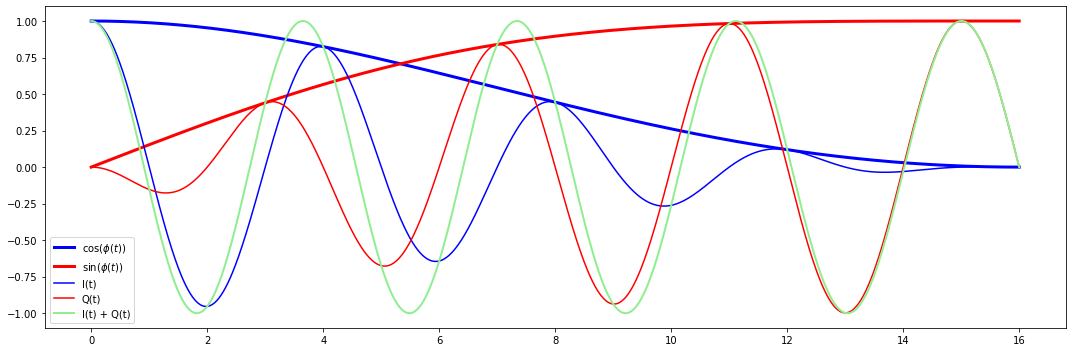

In [11]:
plt.figure(figsize = (15, 5))

plt.plot(t, cos(phi), color = 'blue', linewidth = 3, label = '$\\cos(\\phi(t))$')
plt.plot(t, sin(phi), color = 'red' , linewidth = 3, label = '$\\sin(\\phi(t))$')
plt.plot(t, I, color = 'blue' , label = 'I(t)')
plt.plot(t, Q, color = 'red' , label = 'Q(t)')
plt.plot(t, I + Q, color = 'lightgreen', linewidth = 2, label = 'I(t) + Q(t)')
# plt.plot(t, S, color = 'orange', linewidth = 2, label = 'S')

plt.legend()
plt.tight_layout()
plt.show()

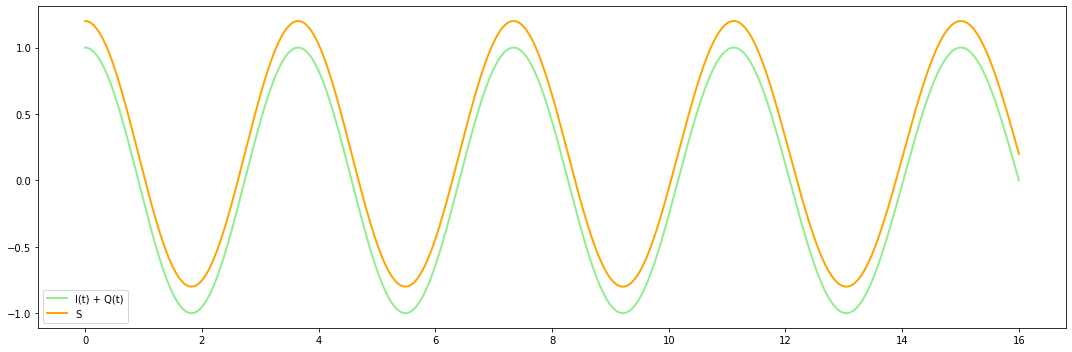

In [12]:
plt.figure(figsize = (15, 5))

plt.plot(t, I + Q, color = 'lightgreen', linewidth = 2, label = 'I(t) + Q(t)')
plt.plot(t, S + 0.2, color = 'orange', linewidth = 2, label = 'S')

plt.legend()
plt.tight_layout()
plt.show()